# Standardization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Split Datasets

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis='columns'),
                                                         df['Purchased'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

## Starndard Scaler

### Step1
**Train dataset**

In [6]:
Scaler = StandardScaler()

In [7]:
# X_train pass in the scaler so that it will learn the parameter
Scaler.fit(X_train) # fit only train dataset not test

StandardScaler()

### Step2
**Transforming**

In [8]:
# now transform the X_tarin and X_test
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

### Step3
**Array to DataFrame**

In [11]:
# as X_train_scaled & X_test_scaled in array format now convert to array to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns) #columns will be X_train cause X_train_scaled has no col
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


### Step4
**Check mean=0 & std=1**

In [13]:
np.round(X_train.describe(),1) # focus on mean and std row

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1) # after standardization mean will be '0' & std will be '1',focus on mean & std row

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Step5
**Effect of Scalling**

Text(0.5, 1.0, 'After Scalling')

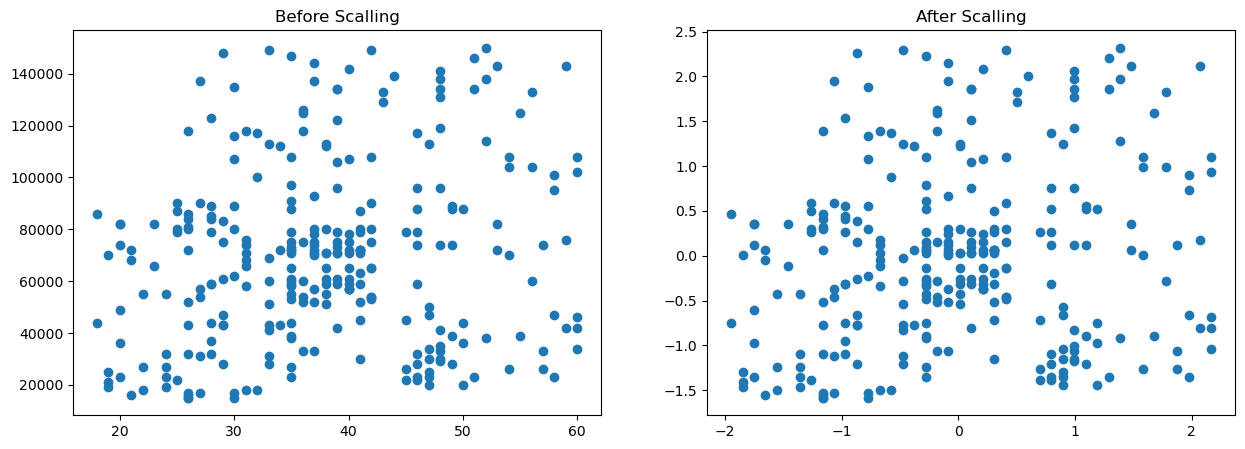

In [15]:
#scatter plot
fig, (x1, x2) = plt.subplots(1,2, figsize = (15, 5))
x1.scatter(x='Age',y='EstimatedSalary',data=X_train)
x1.set_title('Before Scalling')
x2.scatter(x='Age',y='EstimatedSalary',data=X_train_scaled)
x2.set_title('After Scalling')

Text(0.5, 1.0, 'After Scalling')

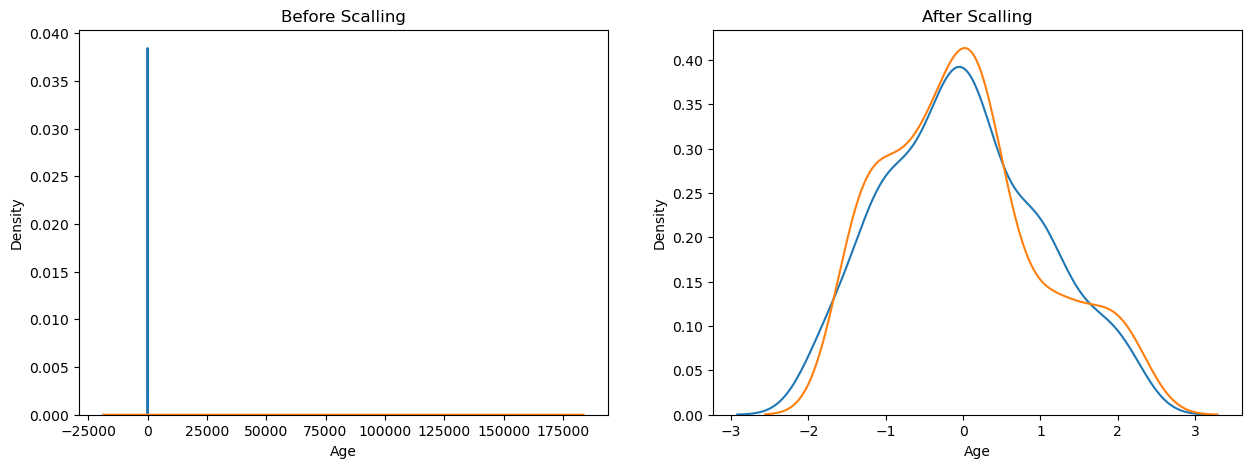

In [16]:
#kde plot
fig, (x1, x2) = plt.subplots(1,2, figsize = (15, 5))
sns.kdeplot(X_train['Age'],ax=x1)
sns.kdeplot(X_train['EstimatedSalary'],ax=x1)
x1.set_title('Before Scalling')

sns.kdeplot(X_train_scaled['Age'],ax=x2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=x2)
x2.set_title('After Scalling')

Text(0.5, 1.0, 'After Scalling')

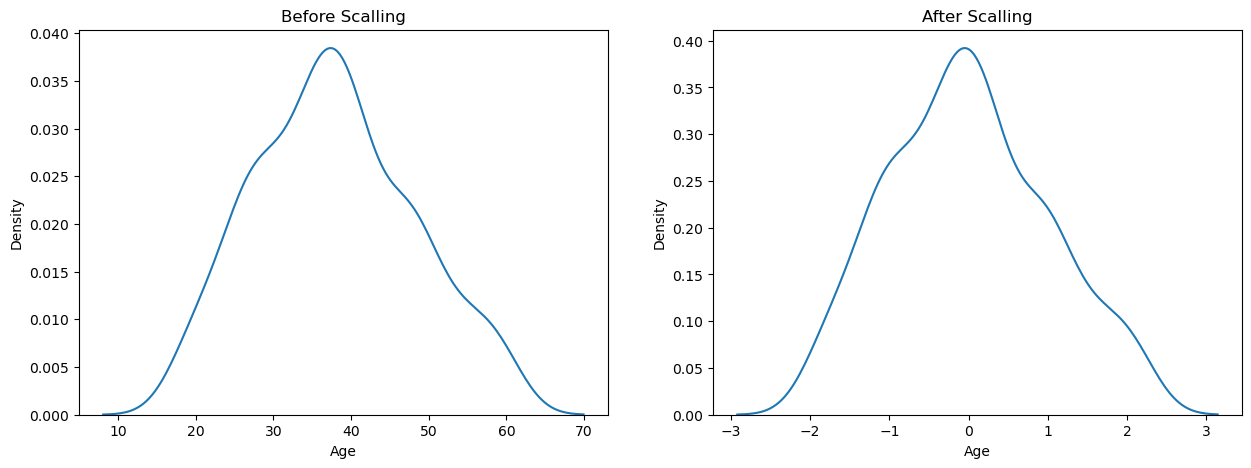

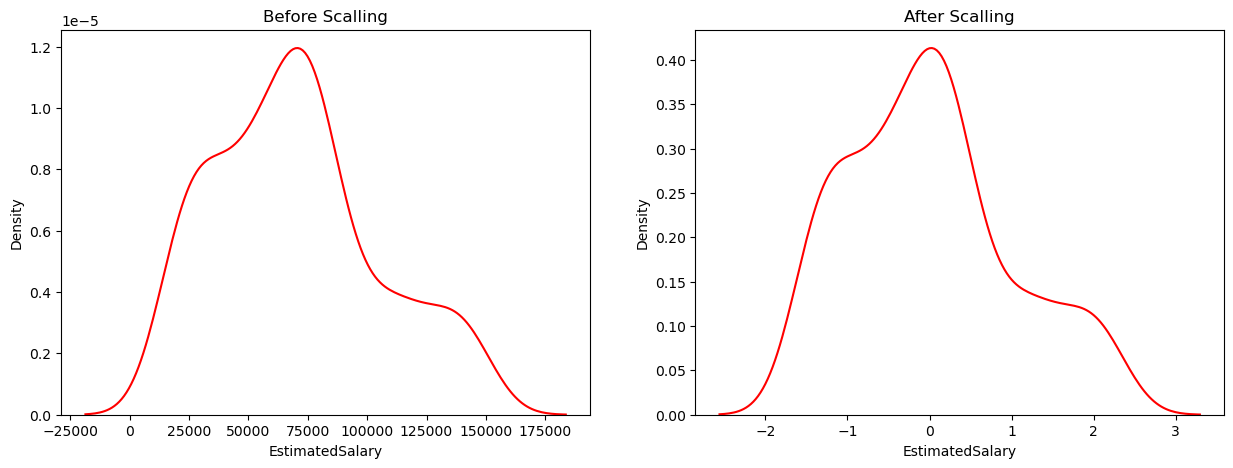

In [17]:
#compare individulally(before & after scalling has no difference)
#for age
fig, (x1, x2) = plt.subplots(1,2, figsize = (15, 5))
sns.kdeplot(X_train['Age'],ax=x1)
x1.set_title('Before Scalling')
sns.kdeplot(X_train_scaled['Age'],ax=x2)
x2.set_title('After Scalling')
#for EstimatedSalary
fig, (x3, x4) = plt.subplots(1,2, figsize = (15, 5))
sns.kdeplot(X_train['EstimatedSalary'],color='r',ax=x3)
x3.set_title('Before Scalling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='r',ax=x4)
x4.set_title('After Scalling')